In [268]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score


Load Dataset

In [269]:
colums_names = ['Passenger','Survived','Pclass','Name','Sex','Age','SibSp','Parch',
                'Ticket','Fare','Cabin','Embacked']
df_train = pd.read_csv('titanic.train.csv',names=colums_names)
df_train.head()

,Passenger,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embacked
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


Split The Data To Predict Who will survive

In [270]:

X_train = df_train.iloc[:,:-1]
y_train = df_train.Survived
print(y_train.head())
lebel_en = LabelEncoder()
y_train = lebel_en.fit_transform(y_train)

0    Survived
1           0
2           1
3           1
4           1
Name: Survived, dtype: object


In [271]:
X_train_encoded = pd.get_dummies(X_train,drop_first=True)

Accuracy 1.0


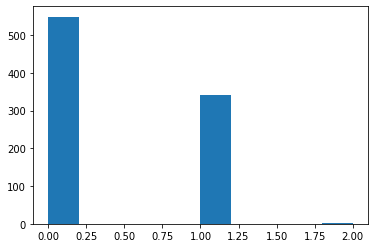

In [272]:

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_train_encoded,y_train)
y_pred = clf.predict(X_train_encoded)
print('Accuracy',metrics.accuracy_score(y_train,y_pred))

plt.hist(y_pred)
plt.show()


Test Data

In [273]:
colums_names = ['Passenger','Survived','Pclass','Name','Sex','Age','SibSp','Parch',
                'Ticket','Fare','Cabin','Embacked']
df_test = pd.read_csv('titanic.train.csv',names=colums_names)
df_test.head()

,Passenger,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embacked
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [274]:
X_test = df_train.iloc[:,:-1]
y_test = df_train.Survived
print(y_test.head())
lebel_en = LabelEncoder()
y_test= lebel_en.fit_transform(y_test)

0    Survived
1           0
2           1
3           1
4           1
Name: Survived, dtype: object


In [275]:
X_test_encoded = pd.get_dummies(X_test,drop_first=True)

Accuracy 1.0


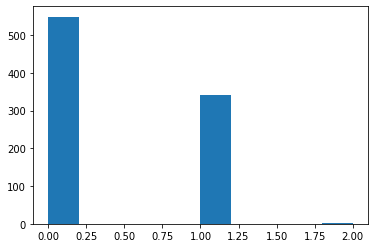

In [276]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_test_encoded,y_test)
y_pred = clf.predict(X_test_encoded)
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

plt.hist(y_pred)
plt.show()